In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import mediapy as media
import pandas as pd
import numpy as np
from diffusers import DDIMScheduler
from pathlib import Path
from local_sd_pipeline import LocalStableDiffusionPipeline
from optim_utils import *
import PIL
import os 
import csv


%load_ext autoreload
%autoreload 2

/zhome/ca/2/153088/memorization/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#Note, that this is not a cleaned notebook. See magnitudes_sscd for a description of procedure. 

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [7]:
print(device)

cuda


In [8]:
sim_model = torch.jit.load("/zhome/ca/2/153088/memorization/sscd_disc_large.torchscript.pt").to(device)

In [20]:
data_mem = []
with open("/zhome/ca/2/153088/memorization/diffusion_memorization/SSCD_and_magnitudes_memorized.csv", 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        name = row[0]
        SSCD = np.array([float(x) for x in row[1].strip('[]').split()])
        noise = eval(row[2])          
        data_mem.append((name, SSCD, noise))
        
data_nonmem = []
with open("/zhome/ca/2/153088/memorization/diffusion_memorization/SSCD_and_magnitudes_nonmemorized.csv", 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        name = row[0]
        SSCD = np.array([float(x) for x in row[1].strip('[]').split()])
        noise = eval(row[2])            
        data_nonmem.append((name, SSCD, noise))

In [21]:
def get_means(data):    
    means_noise = {}
    for name, _, sets_of_values in data:
        mean_values = [sum(values) / len(values) for values in sets_of_values]
        
        overall_mean = sum(mean_values) / len(mean_values)

        means_noise[name] = overall_mean
    means_sscd = [sum(data[i][1]) / len(data[i][1]) for i in range(len(data))]
    return means_noise, means_sscd



In [22]:
means_noise_mem, means_sscd_mem = get_means(data_mem)
means_noise_nonmen, means_sscd_nonmen = get_means(data_nonmem)

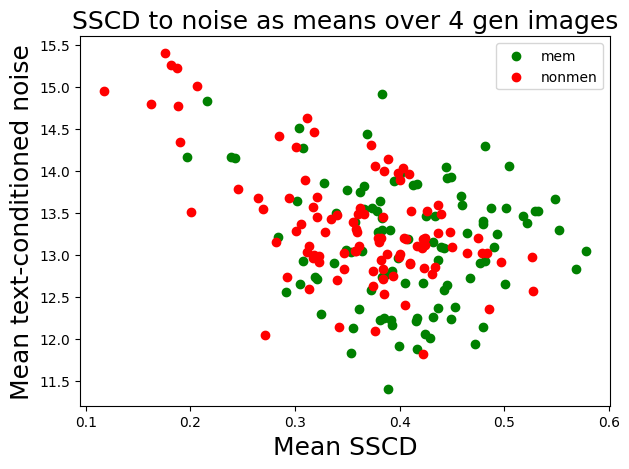

In [34]:

plt.scatter(means_sscd_mem, means_noise_mem.values(), c="green", label="mem")
plt.scatter(means_sscd_nonmen, means_noise_nonmen.values(), c="red", label="nonmen")


plt.title("SSCD to noise as means over 4 gen images", fontsize=18)
plt.xlabel("Mean SSCD", fontsize=18)
plt.ylabel("Mean text-conditioned noise", fontsize=18)

plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig("/zhome/ca/2/153088/memorization/diffusion_memorization/sscd_textcondnoise.png")
plt.show()